In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


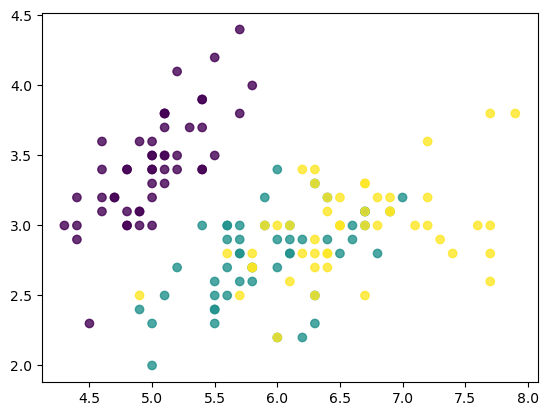

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

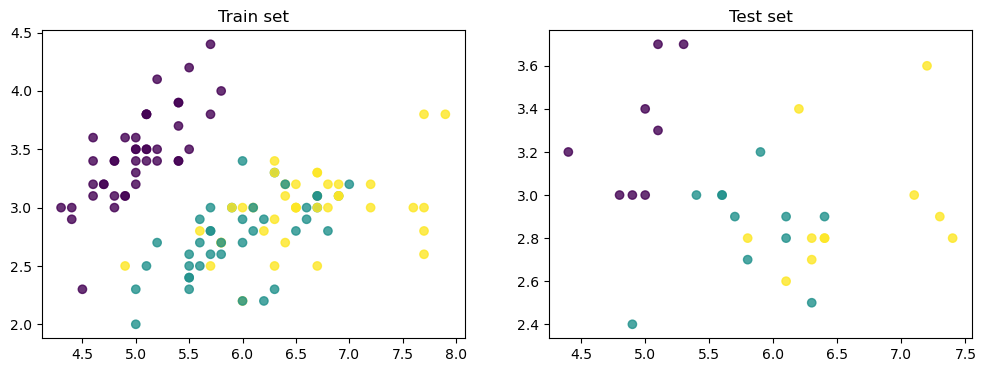

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 0.9833333333333333
Test score: 0.9666666666666667


In [15]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(KNeighborsClassifier(2),X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

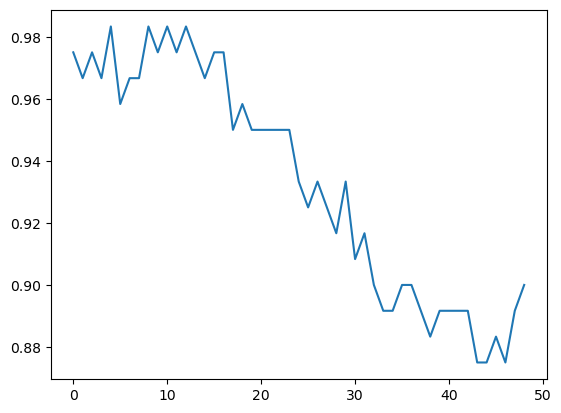

In [23]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

In [24]:
from sklearn.model_selection import validation_curve

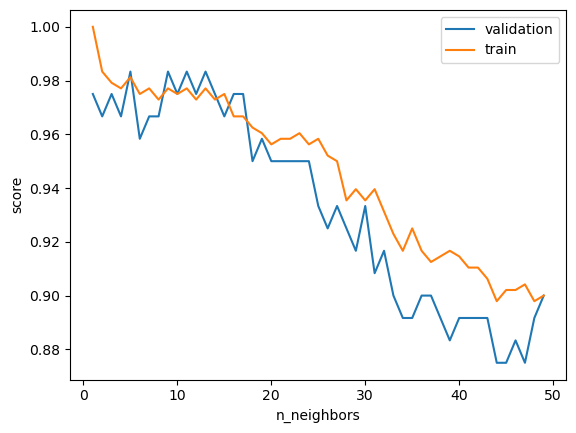

In [31]:
ml = KNeighborsClassifier()
k = np.arange(1,50)
train_score, val_score = validation_curve(
    estimator=ml,
    X=X_train,
    y=y_train,
    param_name='n_neighbors',
    param_range=k,
    cv=5
)
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [32]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [44]:
grid.best_score_

0.9833333333333334

In [45]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [46]:
model = grid.best_estimator_

In [47]:
model.score(X_test, y_test)

0.9333333333333333

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [50]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


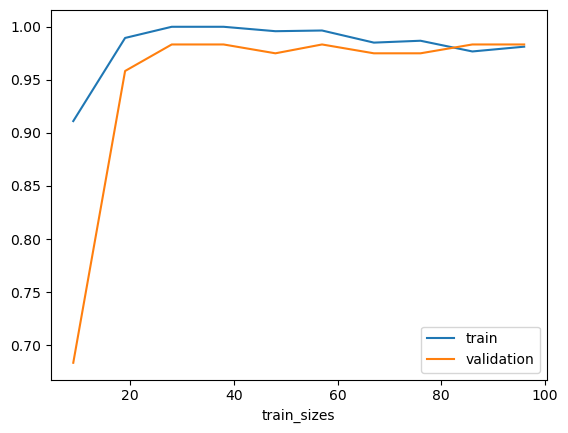

In [56]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                        train_sizes = np.linspace(0.1,1.0,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()